Name: Neha Satish
Date: 3/10/2021

This python notebook will be looking at magntometer data from a Juno Jupiter orbital mission to resample data, analyze magnitudes and standard deviations, and finally plot the data in an image.

In [1]:
import numpy as np                           
import pandas as pd                          
import matplotlib.pyplot as plt               
import datetime as dt 

                                             
import matplotlib.dates as mdt                
import matplotlib.image as mpimg             
    
import importlib                              

from matplotlib.ticker import MultipleLocator 
from matplotlib.ticker import FuncFormatter                

import externalfunctions as extfunc           

%matplotlib inline


This data is from: https://pds-ppi.igpp.ucla.edu/search/view/?f=yes&id=pds://PPI/JNO-J-3-FGM-CAL-V1.0/DATA/JUPITER/SS/PERI-17
The three csv files read in contain Juno Magntometer (FGM) calibrated data from the Juno Jupiter oribtal phases of the three consecutive days of 2018-351, 2018-352, and 2018-353. Specifically, this file contains vector magnetic field data acquired by the FGM instrument aboard the Juno spacecraft. The data are calibrated, provided in physical units (nT), and downsampled to 1 minute. The data in this csv are expressed in Sun-State coordinates.

In [2]:
importlib.reload(extfunc) 

year_val = '2018' 
doy_val  = '351'

example_data1 = extfunc.read_FGM(year_val, doy_val)
example_data1.drop('DATETIME', axis = 1, inplace = True)
example_data1.insert(0, 'DOY', 351)
example_data1.head()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-17 00:00:01,351,607,5.76,0.08,-1.31,-3526412.875,-1657162.036,-580951.255
2018-12-17 00:00:02,351,545,5.77,0.07,-1.29,-3526408.389,-1657159.627,-580949.471
2018-12-17 00:00:03,351,545,5.76,0.06,-1.35,-3526403.603,-1657157.058,-580947.568
2018-12-17 00:00:04,351,545,5.75,0.10,-1.37,-3526398.818,-1657154.489,-580945.665
2018-12-17 00:00:05,351,545,5.76,0.12,-1.44,-3526394.033,-1657151.920,-580943.762


In [3]:
example_data1.tail()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-17 23:59:56,351,438,12.99,4.12,0.70,-3082794.151,-1421918.500,-411884.243
2018-12-17 23:59:57,351,438,13.03,4.10,0.69,-3082788.630,-1421915.608,-411882.231
2018-12-17 23:59:58,351,438,12.97,4.07,0.65,-3082783.110,-1421912.717,-411880.219
2018-12-17 23:59:59,351,438,12.92,4.07,0.61,-3082777.589,-1421909.825,-411878.207
2018-12-18 00:00:00,351,438,12.93,4.06,0.61,-3082772.068,-1421906.934,-411876.195


In [4]:
year_val = '2018' 
doy_val  = '352'

example_data2 = extfunc.read_FGM(year_val, doy_val)
example_data2.drop('DATETIME', axis = 1, inplace = True)
example_data2.insert(0, 'DOY', 352)
example_data2.head()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-18 00:00:01,352,500,12.94,4.04,0.59,-3082766.202,-1421903.861,-411874.057
2018-12-18 00:00:02,352,438,12.93,4.04,0.59,-3082761.027,-1421901.150,-411872.171
2018-12-18 00:00:03,352,438,12.92,4.09,0.56,-3082755.506,-1421898.259,-411870.159
2018-12-18 00:00:04,352,438,12.95,4.06,0.55,-3082749.985,-1421895.367,-411868.146
2018-12-18 00:00:05,352,438,12.90,4.08,0.58,-3082744.464,-1421892.476,-411866.134


In [5]:
example_data2.tail()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-18 23:59:55,352,455,3.68,-2.09,-0.23,-2564111.874,-1153800.313,-233114.168
2018-12-18 23:59:56,352,455,3.53,-2.07,-0.24,-2564105.323,-1153796.971,-233112.042
2018-12-18 23:59:57,352,455,3.46,-2.09,-0.29,-2564098.771,-1153793.628,-233109.915
2018-12-18 23:59:58,352,455,3.48,-2.17,-0.28,-2564092.220,-1153790.285,-233107.789
2018-12-18 23:59:59,352,455,3.59,-2.15,-0.19,-2564085.667,-1153786.942,-233105.662


In [6]:
year_val = '2018' 
doy_val  = '353'

example_data3 = extfunc.read_FGM(year_val, doy_val)
example_data3.drop('DATETIME', axis = 1, inplace = True)
example_data3.insert(0, 'DOY', 353)
example_data3.head()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-19 00:00:01,353,455,3.63,-2.01,-0.26,-2564072.564,-1153780.256,-233101.410
2018-12-19 00:00:02,353,455,3.60,-2.00,-0.32,-2564066.013,-1153776.913,-233099.283
2018-12-19 00:00:03,353,455,3.63,-2.02,-0.25,-2564059.461,-1153773.570,-233097.157
2018-12-19 00:00:04,353,455,3.63,-2.00,-0.20,-2564052.910,-1153770.227,-233095.030
2018-12-19 00:00:05,353,455,3.67,-2.01,-0.13,-2564046.357,-1153766.884,-233092.904


In [7]:
example_data3.tail()

,DOY,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2018-12-19 23:59:55,353,473,-1.57,0.59,-6.13,-1932780.391,-837039.757,-44877.498
2018-12-19 23:59:56,353,473,-1.49,0.61,-6.11,-1932772.163,-837035.700,-44875.276
2018-12-19 23:59:57,353,473,-1.46,0.65,-6.08,-1932763.935,-837031.643,-44873.055
2018-12-19 23:59:58,353,473,-1.46,0.70,-6.03,-1932755.707,-837027.585,-44870.833
2018-12-19 23:59:59,353,473,-1.43,0.79,-6.05,-1932747.479,-837023.528,-44868.612


Since I have shown the head and the tail of all three dataframes, we can assume that all three dataframes have been imported correctly. Next, I will check to see if there are any missing data:

In [8]:
print(len(example_data1))
print(len(example_data2))
print(len(example_data3))

print(example_data1.shape)
print(example_data2.shape)
print(example_data3.shape)

86400
86399
86399
(86400, 8)
(86399, 8)
(86399, 8)


Since the first day has 86,400 values, but the other 2 days have only 86,399 values, the second and third days have a missing data point each. Looking at the last value of the first datafram, it seems as though there is a null start value of the new day — meaning that in the day 351 dataframe, the last point is the 0th second of day 352. This seems to be done intentionally, so that the next day's datafram can start at Hour 0, Minute 0, and Second 1. The other 2 dataframes are missing this 0,0,0 "null" value, and so I will resample in order to keep that placeholder format of the first day's dataframe. 

In [9]:
#merging into one frame:
prev_data_FGM = pd.concat([example_data1, example_data2, example_data3])
print(prev_data_FGM)

                     DOY  MSEC   B_X   B_Y   B_Z        POS_X        POS_Y  \
DATETIME                                                                     
2018-12-17 00:00:01  351   607  5.76  0.08 -1.31 -3526412.875 -1657162.036   
2018-12-17 00:00:02  351   545  5.77  0.07 -1.29 -3526408.389 -1657159.627   
2018-12-17 00:00:03  351   545  5.76  0.06 -1.35 -3526403.603 -1657157.058   
2018-12-17 00:00:04  351   545  5.75  0.10 -1.37 -3526398.818 -1657154.489   
2018-12-17 00:00:05  351   545  5.76  0.12 -1.44 -3526394.033 -1657151.920   
...                  ...   ...   ...   ...   ...          ...          ...   
2018-12-19 23:59:55  353   473 -1.57  0.59 -6.13 -1932780.391  -837039.757   
2018-12-19 23:59:56  353   473 -1.49  0.61 -6.11 -1932772.163  -837035.700   
2018-12-19 23:59:57  353   473 -1.46  0.65 -6.08 -1932763.935  -837031.643   
2018-12-19 23:59:58  353   473 -1.46  0.70 -6.03 -1932755.707  -837027.585   
2018-12-19 23:59:59  353   473 -1.43  0.79 -6.05 -1932747.479  -

In [10]:
#resample

data_FGM = (prev_data_FGM.resample('1S').asfreq())

#And now let's check the lengths again -

print(len(data_FGM), (24*3*60*60), len(prev_data_FGM))



259199 259200 259198


Resample needs data points on either end of the dataframe to be present in order to properly function, and since my second and third day's of data have their last point missing, resample could not work properly. Since the dataframes were concatenated, the third day's 0, 0, 0  time acted as the ending point to the second day's missing data. The third day, however, does not have any ending point, so resample did not work and one data point is still missing. Since this was not explained in the scope of the lab, I left my resample attempt in!

In [11]:
#Convert the spacecraft location data into units of Jupiter Radii


#pass in columns to convert
converted_cols = extfunc.convert_jupiter_r(data_FGM[['POS_X', 'POS_Y', 'POS_Z']])

#create and assign new columns here - 
data_FGM[['POS_X_RJ', 'POS_Y_RJ', 'POS_Z_RJ']] = converted_cols

#take a look 
print(data_FGM[['POS_X_RJ', 'POS_X']].head())

                      POS_X_RJ        POS_X
DATETIME                                   
2018-12-17 00:00:01 -49.325979 -3526412.875
2018-12-17 00:00:02 -49.325916 -3526408.389
2018-12-17 00:00:03 -49.325849 -3526403.603
2018-12-17 00:00:04 -49.325782 -3526398.818
2018-12-17 00:00:05 -49.325715 -3526394.033


In [12]:
print(data_FGM[['B_X', 'B_Y', 'B_Z']].head())

                      B_X   B_Y   B_Z
DATETIME                             
2018-12-17 00:00:01  5.76  0.08 -1.31
2018-12-17 00:00:02  5.77  0.07 -1.29
2018-12-17 00:00:03  5.76  0.06 -1.35
2018-12-17 00:00:04  5.75  0.10 -1.37
2018-12-17 00:00:05  5.76  0.12 -1.44


In [13]:
#convert the magnetic field data into units of Gauss: 
#multiply by the conversion factor and then saving into the same column in the dataframe:
data_FGM['B_XC'] = data_FGM['B_X'].astype(float)*0.00001
data_FGM['B_YC'] = data_FGM['B_Y'].astype(float)*0.00001
data_FGM['B_ZC'] = data_FGM['B_Z'].astype(float)*0.00001

print(data_FGM[['B_XC', 'B_YC', 'B_ZC']].head())

                         B_XC          B_YC      B_ZC
DATETIME                                             
2018-12-17 00:00:01  0.000058  8.000000e-07 -0.000013
2018-12-17 00:00:02  0.000058  7.000000e-07 -0.000013
2018-12-17 00:00:03  0.000058  6.000000e-07 -0.000014
2018-12-17 00:00:04  0.000058  1.000000e-06 -0.000014
2018-12-17 00:00:05  0.000058  1.200000e-06 -0.000014


In [14]:
#Calculate the magnitude of the magnetic field data in nT:
magnitude = extfunc.add_quadrature(data_FGM['B_X'], 
                                   data_FGM['B_Y'], data_FGM['B_Z'])

data_FGM['B_MAG_nT'] = magnitude
print(data_FGM['B_MAG_nT'])

DATETIME
2018-12-17 00:00:01    5.907631
2018-12-17 00:00:02    5.912859
2018-12-17 00:00:03    5.916392
2018-12-17 00:00:04    5.911802
2018-12-17 00:00:05    5.938485
                         ...   
2018-12-19 23:59:55    6.355305
2018-12-19 23:59:56    6.318568
2018-12-19 23:59:57    6.286533
2018-12-19 23:59:58    6.243597
2018-12-19 23:59:59    6.266698
Freq: S, Name: B_MAG_nT, Length: 259199, dtype: float64


In [15]:
#Calculate the magnitude of the magnetic field data in Gauss:
magnitude2 = extfunc.add_quadrature(data_FGM['B_XC'], 
                                   data_FGM['B_YC'], data_FGM['B_ZC'])

data_FGM['B_MAG_Gauss'] = magnitude2
print(data_FGM['B_MAG_Gauss'])

DATETIME
2018-12-17 00:00:01    0.000059
2018-12-17 00:00:02    0.000059
2018-12-17 00:00:03    0.000059
2018-12-17 00:00:04    0.000059
2018-12-17 00:00:05    0.000059
                         ...   
2018-12-19 23:59:55    0.000064
2018-12-19 23:59:56    0.000063
2018-12-19 23:59:57    0.000063
2018-12-19 23:59:58    0.000062
2018-12-19 23:59:59    0.000063
Freq: S, Name: B_MAG_Gauss, Length: 259199, dtype: float64


In [16]:
#Calculating std for magnetic data in nT fo r day 351:
data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_nT'].std()            

2.8528042660007373

In [17]:
#Calculating std for magnetic data in nT fo r day 352:
data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_nT'].std()

3.536095683551541

In [18]:
#Calculating std for magnetic data in nT fo r day 353:
data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_nT'].std()

6.052735689153503

In [19]:
#Calculating std for magnetic data in Gauss fo r day 351:
data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_Gauss'].std()            

2.8528042660007293e-05

In [20]:
#Calculating std for magnetic data in nT fo r day 352:
data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_Gauss'].std()

3.5360956835515293e-05

In [21]:
#Calculating std for magnetic data in nT fo r day 353:
data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_Gauss'].std()

6.052735689153456e-05

In [22]:
from scipy.stats.mstats import gmean, hmean

In [23]:
#Calculate the arithmetic means of the magnitude in nT:
#Day 351:
np.mean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_nT'])

9.870995009012232

In [24]:
#Day 352:
np.mean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_nT'])

14.488252065355727

In [25]:
#Day 353:
np.mean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_nT'])

19.94458166724999

In [26]:
#Calculate the harmonic means of the magnitude in nT: 
#Day 351:
hmean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_nT'])

8.179000394867572

In [27]:
#Day 352:
hmean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_nT'])

12.138841066663064

In [28]:
#Day 353:
hmean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_nT'])

15.838061117441722

In [29]:
#Calculate the geometric means of the magnitude in nT: 
#Day 351:
gmean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_nT'])

9.259455867902469

In [30]:
#Day 352:
gmean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_nT'])

13.76832141187383

In [31]:
gmean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_nT'])

18.52132240319326

In [32]:
# DOING AL OF THE ABOVE IN GAUSSIAN UNITS :
#Calculate the arithmetic means of the magnitude in Gauss:
#Day 351:
np.mean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_Gauss'])

9.870995009012285e-05

In [33]:
#Day 352:
np.mean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_Gauss'])

0.0001448825206535567

In [34]:
#Day 353:
np.mean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_Gauss'])

0.00019944581667249964

In [35]:
#Calculate the harmonic means of the magnitude in Gauss: 
#Day 351:
hmean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_Gauss'])

8.179000394867575e-05

In [36]:
#Day 352:
hmean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_Gauss'])

0.00012138841066663064

In [37]:
#Day 353:
hmean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_Gauss'])

0.0001583806111744173

In [38]:
#Calculate the geometric means of the magnitude in Gauss: 
#Day 351:
gmean(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_Gauss'])

9.259455867902466e-05

In [39]:
#Day 352:
gmean(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_Gauss'])

0.00013768321411873838

In [40]:
gmean(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_Gauss'])

0.0001852132240319323

Comment on your calculated values in a paragraph:

We used a sample of data from three days and calculated the standard deviation within each one of those days in order to generate inferences about the population's standard deviation as a whole. In this case, the population would be every single day's data within the Juno Jupiter oribtal phase index. We had three ways of describing the magnitude: Harmonic, Geometric, and Arithmetic Means. All three describe the daily magnitudes in different ways. Since the harmonic mean is particularly sensitive to lower-than average values, we get the worst case realistic average of magnitudes with this estimation. The geometric mean idicates return, so it provides an estimation for the magnitude under the conditions of a different day, or after a certain amount of time. The regular arithmetic mean provides the average mean value that the magnitudes within each of our three sample days are centerd around. There are differences from day to day. In each one of the calculated values, the mean calculations are increasing between the three days. The units have no effect on the overall distributions of the means. All of the units are simply shifted to a different scale of being multiplied by e^-5. The shape and description of the distribution will remain unchanged, but shifted.

Text(0, 0.5, 'Day 3')

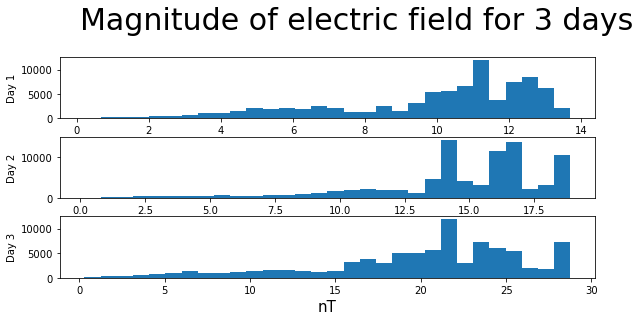

In [63]:
fig = plt.figure(figsize=(11, 7))
gs = plt.GridSpec(5, 2, hspace = 0.3, wspace = 0.0, right = 0.8)
ax2 = fig.add_subplot(gs[0, :])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])
plt.xlabel('nT', fontsize = 15)
fig.suptitle('Magnitude of electric field for 3 days', fontsize = 30)
#first day histogram and labels
ax2.hist(data_FGM.loc[data_FGM['DOY'] == 351]['B_MAG_nT'],bins = 30)
ax2.set_ylabel('Day 1', fontsize = 10)
#second day histogram
ax3.hist(data_FGM.loc[data_FGM['DOY'] == 352]['B_MAG_nT'],bins = 30)
ax3.set_ylabel('Day 2', fontsize = 10)
#day 3 histogram
ax4.hist(data_FGM.loc[data_FGM['DOY'] == 353]['B_MAG_nT'],bins = 30)
ax4.set_ylabel('Day 3', fontsize = 10)

In [43]:
resolution = 50.0 #nT

In [58]:
data_FGM['std'] = data_FGM['DOY']
data_FGM['std'].replace([351, 352, 353], [2.8528042660007373,3.536095683551541,6.052735689153503], inplace = True)
print(data_FGM.head())
print(data_FGM.tail())

                       DOY   MSEC   B_X   B_Y   B_Z        POS_X        POS_Y  \
DATETIME                                                                        
2018-12-17 00:00:01  351.0  607.0  5.76  0.08 -1.31 -3526412.875 -1657162.036   
2018-12-17 00:00:02  351.0  545.0  5.77  0.07 -1.29 -3526408.389 -1657159.627   
2018-12-17 00:00:03  351.0  545.0  5.76  0.06 -1.35 -3526403.603 -1657157.058   
2018-12-17 00:00:04  351.0  545.0  5.75  0.10 -1.37 -3526398.818 -1657154.489   
2018-12-17 00:00:05  351.0  545.0  5.76  0.12 -1.44 -3526394.033 -1657151.920   

                          POS_Z   POS_X_RJ   POS_Y_RJ  POS_Z_RJ      B_XC  \
DATETIME                                                                    
2018-12-17 00:00:01 -580951.255 -49.325979 -23.179685 -8.126102  0.000058   
2018-12-17 00:00:02 -580949.471 -49.325916 -23.179651 -8.126077  0.000058   
2018-12-17 00:00:03 -580947.568 -49.325849 -23.179615 -8.126050  0.000058   
2018-12-17 00:00:04 -580945.665 -49.325782 -23.

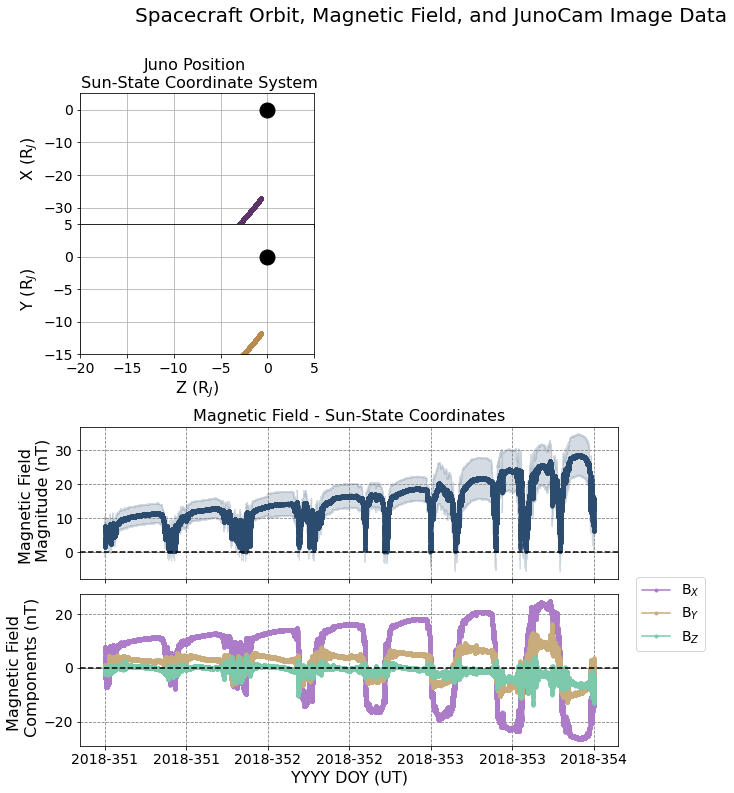

In [59]:
fig = plt.figure(figsize=(13, 12))
fig.suptitle('Spacecraft Orbit, Magnetic Field, and JunoCam Image Data', fontsize=20)

gs_top  = plt.GridSpec(5, 2, hspace=0, wspace=0.3, right=0.7)
gs_bottom = plt.GridSpec(4, 1, hspace=0.1, wspace=0.0, right=0.7)

#add subplots
ax2 = fig.add_subplot(gs_bottom[2, :])
ax3 = fig.add_subplot(gs_bottom[3, :])
ax4 = fig.add_subplot(gs_top[0, 0])
ax5 = fig.add_subplot(gs_top[1, 0])


ax2.plot(data_FGM.index, 
         data_FGM['B_MAG_nT'], 
         marker = '.', 
         color = '#2b4c6e', 
         label = 'B$_{Magnitude}$')

ax2.fill_between(data_FGM.index, 
                 data_FGM['B_MAG_nT'] - data_FGM['std'], 
                 data_FGM['std'] + data_FGM['B_MAG_nT'], 
                 alpha = 0.2, 
                 color = '#2b4c6e')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')



#setting labeling
ax2.set_title('Magnetic Field - Sun-State Coordinates', fontsize = 16)


ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')
ax2.set_xticklabels([])


#SET FORMAT
ax3.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax3.set_xlabel('YYYY DOY (UT)', fontsize = 18)

#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')


ax3.plot(data_FGM.index, 
         data_FGM['B_X'], 
         marker = '.', 
         color = '#ac7cc9', 
         label = 'B$_{X}$')

ax3.plot(data_FGM.index, 
         data_FGM['B_Y'], 
         marker = '.', 
         color = '#c9ac7c', 
         label = 'B$_{Y}$')

ax3.plot(data_FGM.index, 
         data_FGM['B_Z'], 
         marker = '.', 
         color = '#7cc9ac', 
         label = 'B$_{Z}$')

ax4.plot(data_FGM['POS_Z_RJ'], 
         data_FGM['POS_X_RJ'], 
         marker = '.', 
         color = '#5c3566')

ax5.plot(data_FGM['POS_Z_RJ'], 
         data_FGM['POS_Y_RJ'], 
         marker = '.', 
         color = '#b98a4d')

#make start of spacecraft location obvious
ax4.plot(data_FGM['POS_Z_RJ'].iat[0], 
         data_FGM['POS_X_RJ'].iat[0], 
         marker='3', 
         color='k', 
         markersize=40)

ax5.plot(data_FGM['POS_Z_RJ'].iat[0], 
         data_FGM['POS_Y_RJ'].iat[0], 
         marker='3', 
         color='k', 
         markersize=40, 
         label = 'S/C Starting Location')

#x-values
#plot out location of Jupiter
ax4.set_title('Juno Position \n Sun-State Coordinate System', fontsize = 16)
ax4.plot([0], [0], color='k', marker = 'o',  markersize = 15)
ax5.plot([0], [0], color='k', marker = 'o',  markersize = 15)



ax4.set_ylim([-35, 5])
ax5.set_ylim([-15, 5])

ax4.set_xticklabels([])

ax4.set_xlim([-20, 5])
ax5.set_xlim([-20, 5])

ax4.grid()
ax5.grid()

ax4.tick_params(labelsize = 14)
ax5.tick_params(labelsize = 14)

ax4.set_ylabel('X (R$_{J}$)', fontsize = 16)
ax5.set_xlabel('Z (R$_{J}$)', fontsize = 16)
ax5.set_ylabel('Y (R$_{J}$)', fontsize = 16)


ax3.axhline(y=0.0, color = 'k', linestyle = '--')
ax2.set_ylabel('Magnetic Field \n Magnitude (nT)', fontsize = 16)
ax3.set_ylabel('Magnetic Field \n Components (nT)',      fontsize = 16)
ax3.set_xlabel('YYYY DOY (UT)', fontsize = 16)



ax3.legend(bbox_to_anchor = (1.02, 1.16), prop={'size':14})


ax3.tick_params(labelsize = 14)
#set up the grid
ax3.grid(color = 'gray', linestyle = 'dashed')

#savefigure
plt.savefig('./Images/JunoCam_MagData_{:%Y-%j-%H-%M}.png'.format(data_FGM.index[0]), 
            dpi=300, bbox_inches='tight')

a)

The spacecraft is at approximately -30 R_j away in the equator of Jupiter, and somewhere between -10 to 15 R_j in height. The Sun's rotation axis seems to be at approx -3 R_J. The spacecraft seems to be moving around Jupiter in a diagonal orbit, facing towards to the northeast (as seen by the vector). At these locations, the magnetic field measures were on average, between 10 to 20 nanoteslas.


b) 

The standard error is a reasonable error to show on the plot in step 4 since what I plotted in the exploratory figures was a histogram. Since standard deviation would need to be calculated rather than simply gathered by the scattering of data points, for an exploratory graph, the standard error may be better. Since the explanatory graphs are unimodal in nature as well, the data points would cluster around a common mean on the three seperate days. The skew should be noted as well: for skewed distributions, the standard deviation would not give any reliable information on the asymmetry. The 1st and 3rd quartiles or the interquartile range would give a better estimate of the asymmetry and the data as a whole. The Standard error would better take care of outliers in a less data influencing way than the standard deviation would. We use the standard deviation when we want to see the range of our measurements (meaning how scattered the data is). We would instead use standard error if we want to know the uncertainty around the mean estimate. We may consider using corellation or regressions to show uncertainty, if we were to plot a scatterplot of certain datapoints. The correlation would show us the relationship between variables and how sure we are of that relationship. The linear regression line would allow us to get estimates and know how uncertain those estimates could be to the general real value. 